Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

Now, based on the objective, Model should concentrate on predicting as many true customers who will opt for Personal Loan as possible.

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

In [2]:
#Load insurance data set into insurance dataframe
PersonalLoan = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
PersonalLoan.head()
# We can see that we have 14 columns and the value are failry good

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
PersonalLoan.shape
#check the shape of the data - data contains 13 features and 5000 records / rows

(5000, 14)

In [5]:
PersonalLoan.describe().transpose()
#Check details of each columns 
#ID is clearly one to one map and can be dropped for further analysis
#Age data is clearly for adult populations ranging from 23 to 67
#Mortgage is highly skewed as per below numbers


,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
PersonalLoan.info()
# so we can observe that there is no Null values in our data set
# Data types for all columns is fairly good because it is consistant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Since ID is one to one map for each row so it can be deleted.
PersonalLoan.drop(labels = 'ID', axis = 1 , inplace = True)

In [8]:
PersonalLoan.shape
#number of columns is reduced by 1

(5000, 13)

In [9]:
PersonalLoan.isnull().any().any()
#Another way to check for NULL values

False

In [10]:
PLCols = PersonalLoan.columns #list of columns to be passed as an argument in future commands
PLCols

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

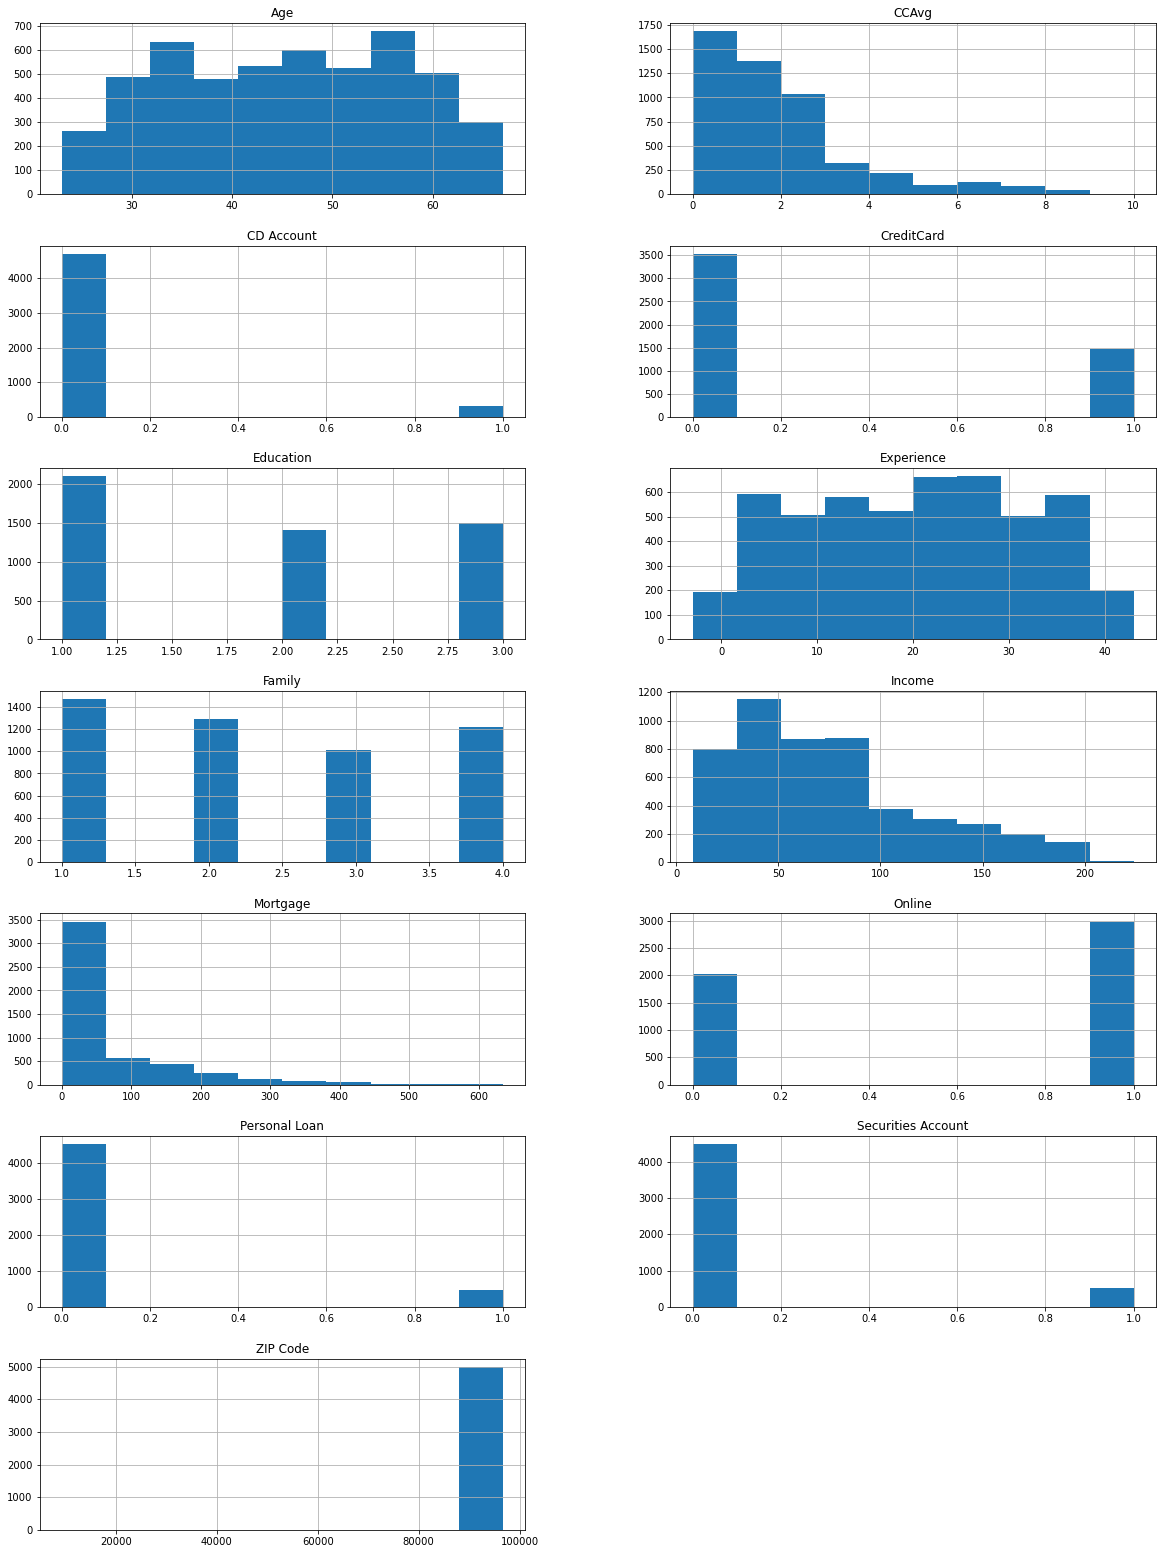

In [11]:
PersonalLoan.hist(figsize=(20,40), layout=(10,2));
#See the distribution of each and every column


we can observe that data for Age, Creditcard, Education, Experience, family, online is well distributed

Also, distribution for CAvg, CD Account, income, Mortgage, Personal Loan, Securities account, ZIP Code is skewed

In [12]:
# For Skewness, closer the value to 0, perfectly the distribution follows normal distribution
#negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure.
#positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure.
Skewvalue = PersonalLoan.skew()
print(Skewvalue)


Age                   -0.029341
Experience            -0.026325
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Personal Loan          2.743607
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64


Based on below numbers, apart from above inference we made looking at the histograms, we can consider Income to be fairly okay distribution as well. 
So we can consider that data for Age, Experience, Income,family, Education, Creditcard, online is less skewed as compared to ZIP Code, CCavg, Mortgage, Personal Loan, Securitied Account CD Accounts

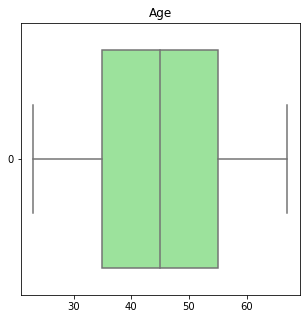

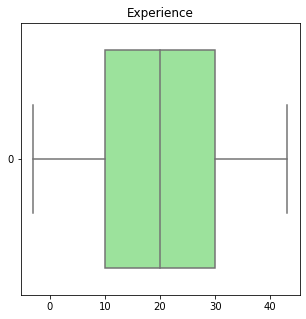

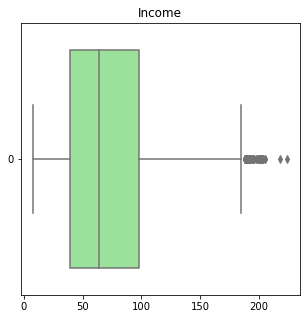

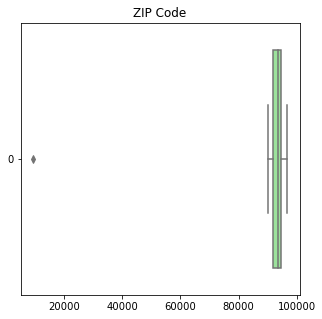

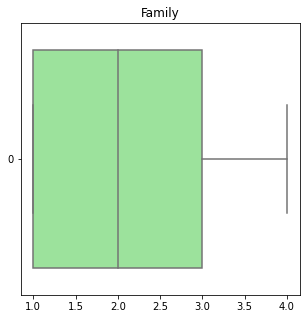

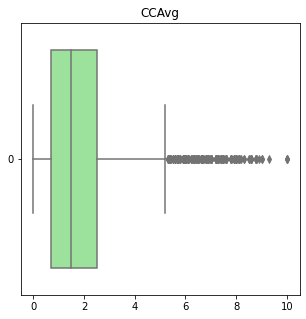

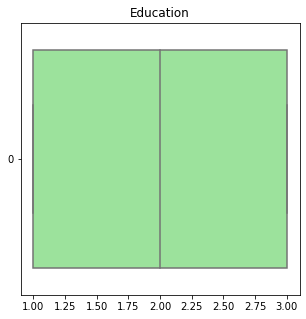

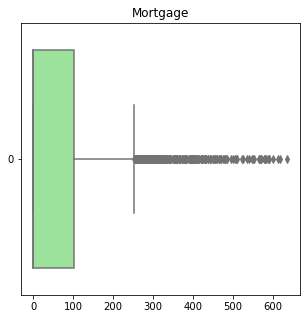

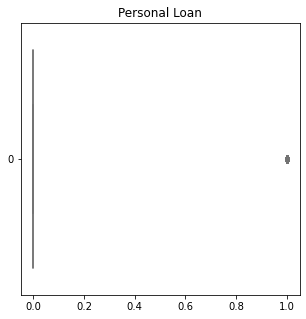

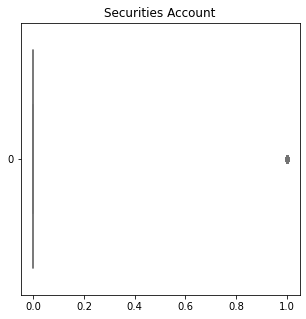

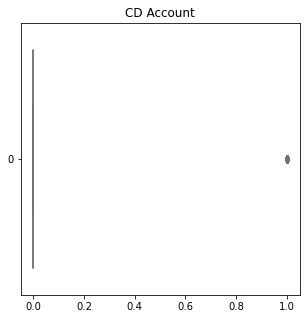

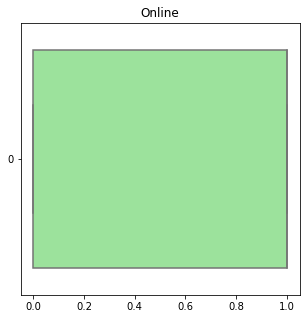

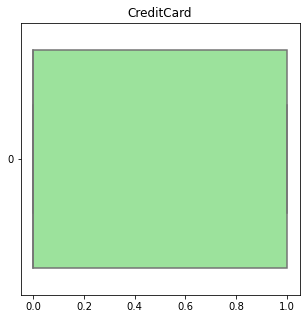

In [13]:
# Now lets check Outliers for each column
for columns in PersonalLoan:
    plt.figure(figsize = (5,5))
    plt.title(columns)
    sns.boxplot(data = PersonalLoan[columns] , orient= 'h' , color='LightGreen')
    


From below we can infer that Income, CCAvg, ZIp code, Mortgage , Personal Loan, Securities Accunt and CD Accounts contains outliers

In [14]:
PersonalLoan.groupby('Personal Loan').count()
#Loan distribution is almost 9:1

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480


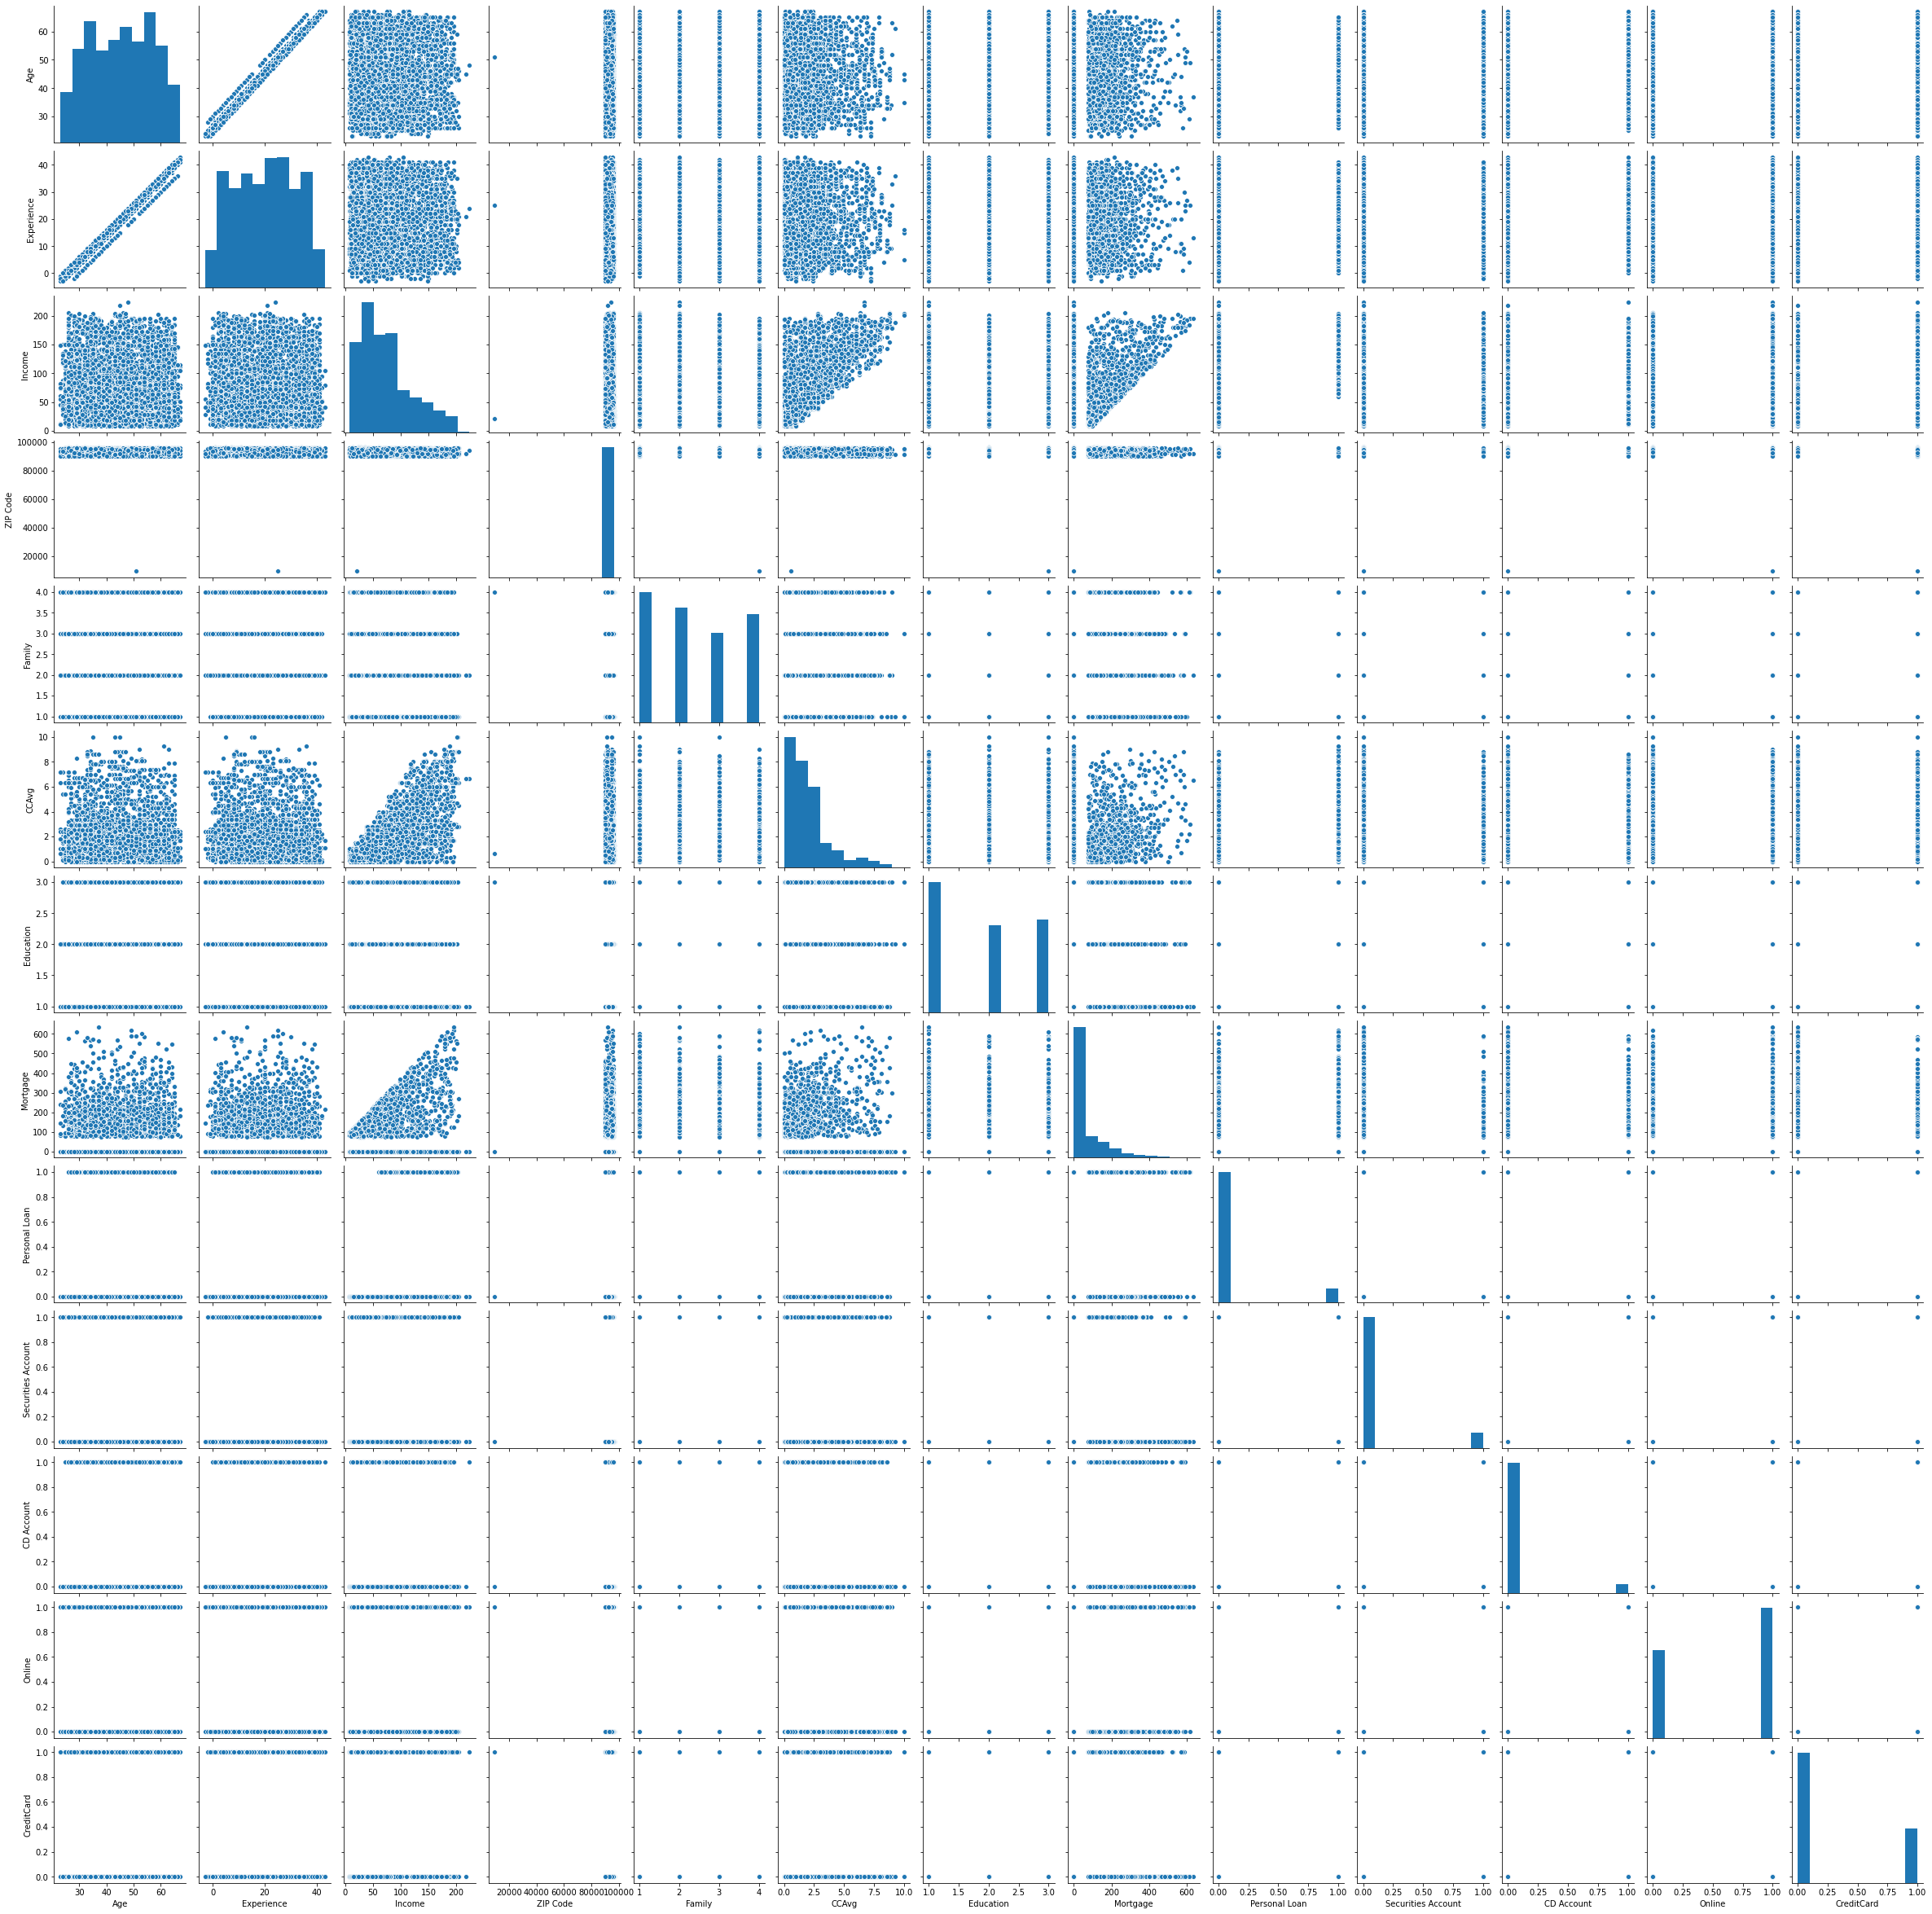

In [15]:
sns.pairplot(PersonalLoan)
# Checking the correlation using pairplot, we can observe that due to high number of columns it gets
# difficult to understand the plot

<Figure size 1080x576 with 0 Axes>

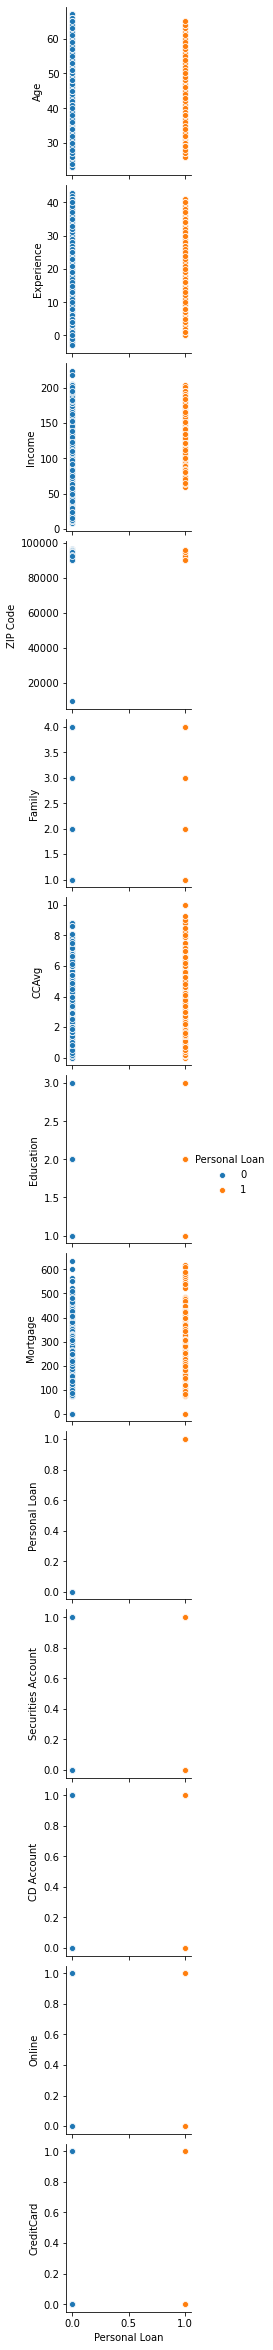

In [16]:
plt.figure(figsize = (15,8))
sns.pairplot(PersonalLoan, x_vars="Personal Loan" , y_vars=PLCols , hue = "Personal Loan" )
# pairplot for Personal Loan against all other columns
# we can see that people who opted for Personal Loan are of 
#age say 27 to 65, experience of 0 to 40, Income of 50,000 to 2,00,000

In [17]:
#for correlation, closer the value to 1, higher is the corelation betwen two features
PersonalLoan.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


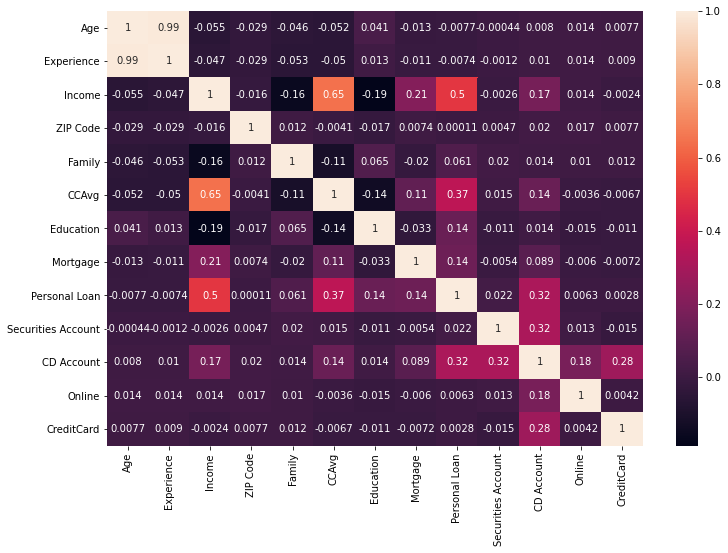

In [18]:
#Visual representation of above correlation 
plt.figure(figsize = (12,8))
sns.heatmap(PersonalLoan.corr(), annot = True )

From above we can infer that there is some correlation of Personal Loan with Income, Family, CCavg, education,
mortgage, CD Account

Correlation of Age, Experience, Zip Code,Securities Account, Online, CreditCard is either negative or too low, 
hence we can infer that these feature won't support much for an individual to apply for Personal Loan and 
can be dropped while creating a model

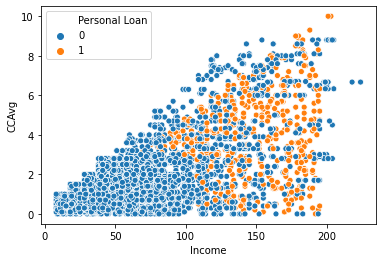

In [20]:
#Lets check distribution of personal loan based on the most high correlated features
sns.scatterplot(x = 'Income', y = 'CCAvg', hue = 'Personal Loan', data = PersonalLoan)
# so we can infer that Loan is bought by the customers having income more that around $60,000 and across all the spenditure on credit cards

#### Converting Target column into catergory 

In [22]:
#Converting Personal Loan column as category
PersonalLoan['Personal Loan'] = PersonalLoan['Personal Loan'].astype('category')

In [23]:
#Round check for above change
PersonalLoan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   int64   
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   int64   
 10  CD Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 473.9 KB


In [24]:
#Run this line only once 
PersonalLoan[['Income','CCAvg','Mortgage']] = PersonalLoan[['Income','CCAvg','Mortgage']]*1000
#Lets get the actual values of each column

In [25]:
PersonalLoan.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,91107,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90089,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94720,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94112,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91330,4,1000.0,2,0,0,0,0,0,1


# Creating Training and Testing data sets

In [26]:
#Creating Training and test data set without dropping any feature

X = PersonalLoan.drop(labels = "Personal Loan" , axis = 1)
Y = PersonalLoan['Personal Loan']
print('Shape of X and Y data set is ', X.shape , Y.shape, 'respctively')

Shape of X and Y data set is  (5000, 12) (5000,) respctively


In [27]:
#Creating Training data set by dropping the features which does not have considerable correation with Personal Loan

Xdrop = PersonalLoan[['Income','Family','CCAvg','Education','Mortgage','CD Account']]
print('Shape of X data set after dropping non correlated features', Xdrop.shape)
            

Shape of X data set after dropping non correlated features (5000, 6)


# Splitting data set into 70 : 30 ratio

In [28]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [30]:
print("Original Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(PersonalLoan.loc[PersonalLoan['Personal Loan'] == 1]), (len(PersonalLoan.loc[PersonalLoan['Personal Loan'] == 1])/len(PersonalLoan.index)) * 100))
print("Original Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(PersonalLoan.loc[PersonalLoan['Personal Loan'] == 0]), (len(PersonalLoan.loc[PersonalLoan['Personal Loan'] == 0])/len(PersonalLoan.index)) * 100))
print("")
print("Training Personal Loan True Values    : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 1]), (len(Y_train[Y_train[:] == 1])/len(Y_train)) * 100))
print("Training Personal Loan False Values   : {0} ({1:0.2f}%)".format(len(Y_train[Y_train[:] == 0]), (len(Y_train[Y_train[:] == 0])/len(Y_train)) * 100))
print("")
print("Test Personal Loan True Values        : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 1]), (len(Y_test[Y_test[:] == 1])/len(Y_test)) * 100))
print("Test Personal LoanFalse Values       : {0} ({1:0.2f}%)".format(len(Y_test[Y_test[:] == 0]), (len(Y_test[Y_test[:] == 0])/len(Y_test)) * 100))
print("")

Original Personal Loan True Values    : 480 (9.60%)
Original Personal Loan False Values   : 4520 (90.40%)

Training Personal Loan True Values    : 331 (9.46%)
Training Personal Loan False Values   : 3169 (90.54%)

Test Personal Loan True Values        : 149 (9.93%)
Test Personal LoanFalse Values       : 1351 (90.07%)



# Logistic Regression

In [31]:
# import logistic regression and train on tarining set
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix



#### Logistic Regression for original data

In [33]:
LR_model = LogisticRegression(random_state=0)
LR_model.fit(X_train, Y_train)

# Prediction on test data
Y_pred = LR_model.predict(X_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic Regression model on Original test data is', accuracy_score(Y_test, Y_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(Y_test, Y_pred))

Accuracy of the Logistic Regression model on Original test data is 90.2


 Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1351
           1       0.51      0.28      0.36       149

    accuracy                           0.90      1500
   macro avg       0.72      0.63      0.66      1500
weighted avg       0.88      0.90      0.89      1500



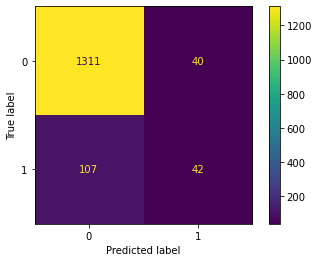

In [34]:
# Plotting confusion matrix
plot_confusion_matrix(LR_model,X_test,Y_test)


part 1: 
Model predicted 1311 (TN) cases correctly as people will not opt for Personal loan and 40 (FN) cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 107 (FP) cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 42 (TP) cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, we will require better performance on part 2.


#### Splitting data based on the dropped non correlated feature data set

In [35]:
# Split Xdrop and y into training and test set in 75:25 ratio
Xd_train, Xd_test, Yd_train, Yd_test = train_test_split(Xdrop, Y, test_size=0.30, random_state=1)

#### Logistic Regression model for data with dropped non correlated features

In [36]:
# Lets try creating model from data set with dropped non correlated features
LR_model1 = LogisticRegression(random_state=0)
LR_model1.fit(Xd_train, Yd_train)

# Prediction on test data
Yd_pred = LR_model1.predict(Xd_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model on dropped features test data is', accuracy_score(Yd_test, Yd_pred)*100)

#We can see accuracy is almost same as comapred with above model
print('\n\n Classification Report:')
print(metrics.classification_report(Yd_test, Yd_pred))

Accuracy of the Logistic regression model on dropped features test data is 90.06666666666666


 Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



C:\Users\FenilM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


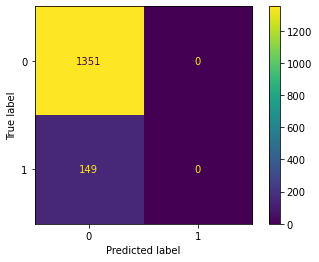

In [37]:
# Plotting confusion matrix
plot_confusion_matrix(LR_model1,Xd_test,Yd_test)


part 1: 
Model predicted all 1351 cases correctly as people will not opt for Personal loan 

Part 2:
Model predicted all 149 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan 

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, we can say that this model's failure is 100%


#### Scaling the data sets to standardized values

In [38]:
#Lets try creating the model with standardized values for original data set
# Apply zscore
Xtrainsc = X_train.apply(zscore)
Xtestsc = X_test.apply(zscore)

#Lets try creating the model with standardized values for data set with dropped non correlated features
# Apply zscore
Xdtrainsc = Xd_train.apply(zscore)
Xdtestsc = Xd_test.apply(zscore)

In [39]:
Xtrainsc.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,0.135977,0.156137,-0.837058,0.508804,-0.344955,-0.365708,-1.055713,-0.557707,-0.341736,-0.258356,0.831648,-0.650648
4768,-0.646212,-0.538578,-0.750406,-0.016120,-1.217944,0.037876,0.135453,-0.557707,-0.341736,-0.258356,0.831648,-0.650648
65,1.178895,1.285050,1.242590,-0.794212,-1.217944,1.075664,-1.055713,-0.557707,-0.341736,-0.258356,0.831648,1.536929
177,-1.428400,-1.493812,-0.187168,0.432677,1.401022,-0.077434,0.135453,1.869923,-0.341736,-0.258356,-1.202432,-0.650648
4489,-0.559302,-0.625418,-1.140340,1.046122,0.528033,-0.999912,0.135453,-0.557707,-0.341736,-0.258356,0.831648,-0.650648


#### Logistic Regression for scaled original data

In [42]:
LR_model2 = LogisticRegression(random_state=0)
LR_model2.fit(Xtrainsc, Y_train)

# Prediction on of test data
Ysc_pred = LR_model2.predict(Xtestsc)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model on Original Scaled test data is', accuracy_score(Y_test, Ysc_pred)*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(Y_test, Ysc_pred))

Accuracy of the Logistic regression model on Original Scaled test data is 94.73333333333333


 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500



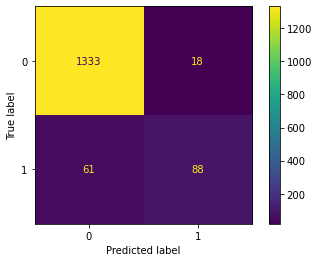

In [43]:
#Plotting confusion matrix
plot_confusion_matrix(LR_model2,Xtestsc,Y_test)


part 1: 
Model predicted 1333 cases correctly as people will not opt for Personal loan and 18 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 61 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 88 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, success rate of this model predeciting TP cases is almost 60% (True Positive prediction/Total positive cases*100)

#### Logistic Regression model for scaled data with dropped non correlated features

In [44]:
LR_model3 = LogisticRegression(random_state = 0)
LR_model3.fit(Xdtrainsc,Yd_train)
Ydsc_pred = LR_model3.predict(Xdtestsc)
print('Accuracy of the Logistic Regression model on dropped features and Scaled test data is', accuracy_score(Yd_test, Ydsc_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(Yd_test, Ydsc_pred))

Accuracy of the Logistic Regression model on dropped features and Scaled test data is 94.39999999999999


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.83      0.55      0.66       149

    accuracy                           0.94      1500
   macro avg       0.89      0.77      0.82      1500
weighted avg       0.94      0.94      0.94      1500



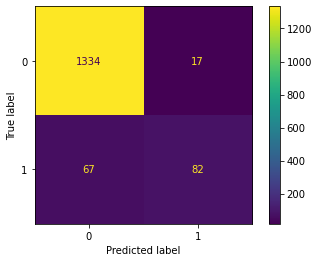

In [45]:
#Plotting confusion matrix
plot_confusion_matrix(LR_model3,Xdtestsc,Yd_test)


part 1: 
Model predicted 1334 cases correctly as people will not opt for Personal loan and 17 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 67 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 82 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, success rate of this model predeciting TP cases is almost 55% (True Positive prediction/Total positive cases*100)

#### - From above 4 model's accuracy rate, we can infer that predictions are better with scaled data sets, hence we can explore other models on the scaled data only

# K-NN model

#### KNN model for scaled data without dropping any features

In [46]:
#Importing libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

In [47]:
#Since we are getting better model for scaled data, we will use Xtrainsc, Xtestsc  and Y_train, Y_test

KNN_M1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN_M1.fit(Xtrainsc, Y_train)
Ysc_pred = KNN_M1.predict(Xtestsc)
print('Accuracy of the KNN model on Original Scaled training data is', accuracy_score(Y_test,Ysc_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(Y_test, Ysc_pred))

Accuracy of the KNN model on Original Scaled training data is 94.86666666666666


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1351
           1       0.95      0.51      0.66       149

    accuracy                           0.95      1500
   macro avg       0.95      0.75      0.82      1500
weighted avg       0.95      0.95      0.94      1500



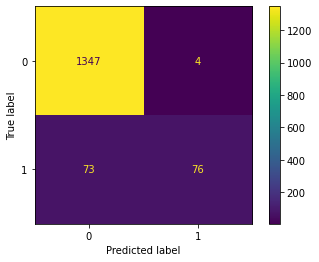

In [48]:
#Plotting confusion matrix
plot_confusion_matrix(KNN_M1,Xtestsc,Y_test)


part 1: 
Model predicted 1347 cases correctly as people will not opt for Personal loan and 4 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 73 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 76 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, success rate of this model predeciting TP cases is almost 50% (True Positive prediction/Total positive cases*100)

Since choosing correct k value for KNN model is very important and subjective, we can try checking generating accuracy and true positive predictions for k = sqrt(n) , which is 70 in our case

In [49]:
scores =[]
TP =[]
for k in range(1,70):
    KNN_M2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_M2.fit(Xtrainsc, Y_train)
    Ysc_pred = KNN_M2.predict(Xtestsc)
    scores.append(KNN_M2.score(Xtestsc,Y_test))
    cm = confusion_matrix(Y_test,Ysc_pred)
    TP.append(cm[1][1])
    

In [50]:
print('Accuracy score for KNN model on original scaled data with k =1 to 70\n')
print(scores)
print('\nTrue Positive predictions for KNN model on original scaled data with k =1 to 70\n')
print(TP)

Accuracy score for KNN model on original scaled data with k =1 to 70

[0.9466666666666667, 0.9466666666666667, 0.95, 0.95, 0.9486666666666667, 0.9493333333333334, 0.9473333333333334, 0.9486666666666667, 0.9453333333333334, 0.9466666666666667, 0.9466666666666667, 0.9446666666666667, 0.9446666666666667, 0.944, 0.9446666666666667, 0.9433333333333334, 0.9433333333333334, 0.9406666666666667, 0.94, 0.9413333333333334, 0.9406666666666667, 0.9413333333333334, 0.9406666666666667, 0.9406666666666667, 0.94, 0.9386666666666666, 0.938, 0.938, 0.9393333333333334, 0.936, 0.9373333333333334, 0.936, 0.9353333333333333, 0.9346666666666666, 0.934, 0.934, 0.9333333333333333, 0.9326666666666666, 0.934, 0.9333333333333333, 0.9313333333333333, 0.9313333333333333, 0.9306666666666666, 0.9306666666666666, 0.9306666666666666, 0.9306666666666666, 0.93, 0.9306666666666666, 0.9293333333333333, 0.9293333333333333, 0.9286666666666666, 0.9306666666666666, 0.9286666666666666, 0.93, 0.9293333333333333, 0.929333333333333

From above we can see that higher the k value performance of the model is degraded,
Number of True positive is highest for k_neighbors 1 and 2, so we can choose k value to 2 which gives us accuracy score of 94.6 % and correctly estimating 92 people number of people who will be opting for Peronal loan which becomes almost 62% success rate for TP predections

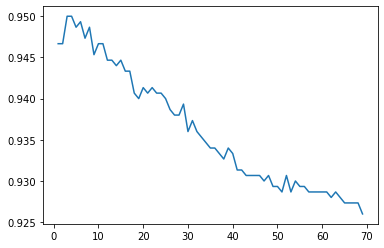

In [51]:
# visual representation of scores for k = 1 to 70
plt.plot(range(1,70),scores)

#### KNN model for data with dropped features

In [52]:
#SInce we are getting better model for scaled data, we will use Xdtrainsc, Xdtestsc  and Y_train, Y_test as well
# Based on our previous observation lets start with chosing k value as 2 
KNN_M1 = KNeighborsClassifier(n_neighbors= 2 , weights = 'distance' )
KNN_M1.fit(Xdtrainsc, Yd_train)
Ydsc_pred = KNN_M1.predict(Xdtestsc)
print('Accuracy of the KNN model on dropped features and Scaled training data is', accuracy_score(Yd_test,Ydsc_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(Yd_test, Ydsc_pred))

Accuracy of the KNN model on dropped features and Scaled training data is 97.13333333333334


 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1351
           1       0.91      0.79      0.85       149

    accuracy                           0.97      1500
   macro avg       0.94      0.89      0.92      1500
weighted avg       0.97      0.97      0.97      1500



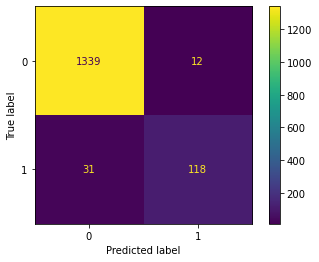

In [53]:
#Plotting confusion matrix
plot_confusion_matrix(KNN_M1,Xdtestsc,Yd_test)

#We can see that 118 are True positive and 31 are True negative, which is so far the best predciton ratio


part 1: 
Model predicted 1339 cases correctly as people will not opt for Personal loan and 12 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 31 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 118 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, success rate of this model predeciting TP cases is almost 79% (True Positive prediction/Total positive cases*100)

In [54]:
#As observed in the previous KNN model, higher the k value lower is the accuracy for the model, 
#So we can check accuracy for 20 k neighbors instead of 70 (to save our computation time)
scores =[]
TP =[]
for k in range(1,20):
    KNN_M2 = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    KNN_M2.fit(Xdtrainsc, Yd_train)
    Ydsc_pred = KNN_M2.predict(Xdtestsc)
    scores.append(KNN_M2.score(Xdtestsc,Yd_test))
    cm = confusion_matrix(Yd_test,Ydsc_pred)
    TP.append(cm[1][1])

In [55]:
print('Accuracy score for KNN model on original scaled data with k =1 to 20\n')
print(scores)
print('\nTrue Positive predictions for KNN model on original scaled data with k =1 to 290\n')
print(TP)

Accuracy score for KNN model on original scaled data with k =1 to 20

[0.9713333333333334, 0.9713333333333334, 0.972, 0.972, 0.9693333333333334, 0.97, 0.9693333333333334, 0.9686666666666667, 0.966, 0.966, 0.966, 0.9666666666666667, 0.964, 0.966, 0.9633333333333334, 0.9646666666666667, 0.9613333333333334, 0.9626666666666667, 0.96]

True Positive predictions for KNN model on original scaled data with k =1 to 290

[118, 118, 111, 111, 107, 108, 107, 106, 102, 101, 101, 102, 98, 101, 98, 100, 95, 97, 93]


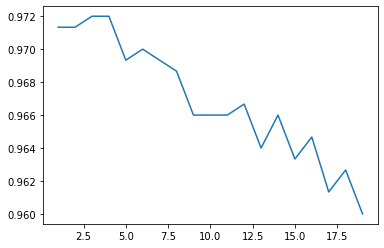

In [56]:
# visual representation of scores for k = 1 to 70
plt.plot(range(1,20),scores)

From above we can see that accuracy score for k = 3 and 4 is highest but number of TP predictions is highest for k = 1 and 2, considering our objective, we will select k = 2 which gives us accuracy score of 97.1 % but correctly estimating 118 number of people who will be opting for Peronal loan (TP) which becomes 79% success rate for true positive predections

## Naive bayes

#### Naive Bayes model for scaled data without dropping any features

In [57]:
#Import necessary libraries
from sklearn.naive_bayes import GaussianNB

#SInce we are getting better model for scaled data, we will use Xtrainsc, Xtestsc  and Y_train, Y_test
NB_M1 = GaussianNB()
NB_M1.fit(Xtrainsc, Y_train)
Ysc_pred = NB_M1.predict(Xtestsc)
print('Accuracy of the Naive Bayes model on Original Scaled training data is', accuracy_score(Y_test,Ysc_pred)*100)
print("\n\nClassification Report")
print(metrics.classification_report(Y_test, Ysc_pred))

Accuracy of the Naive Bayes model on Original Scaled training data is 86.93333333333332


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.38      0.52      0.44       149

    accuracy                           0.87      1500
   macro avg       0.66      0.72      0.68      1500
weighted avg       0.89      0.87      0.88      1500



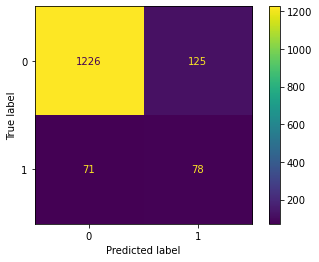

In [58]:
#Plotting confusion matrix
plot_confusion_matrix(NB_M1,Xtestsc,Y_test)


part 1: 
Naive Bayes Model predicted 1226 cases correctly as people will not opt for Personal loan and 125 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 71 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 78 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, this model predicts good but not as good as KNN model

#### Naive Bayes model for data with dropped features

In [59]:
#SInce we are getting better model for scaled data, we will use Xdtrainsc, Xdtestsc  and Y_train, Y_test as well
NB_M2 = GaussianNB()
NB_M2.fit(Xdtrainsc, Yd_train)
Ydsc_pred = NB_M2.predict(Xdtestsc)
print('Accuracy of the Naive Bayes model on dropped features and Scaled training data is', accuracy_score(Yd_test,Ydsc_pred)*100)
print('\n\n Classification Report:')
print(metrics.classification_report(Yd_test, Ydsc_pred))

Accuracy of the Naive Bayes model on dropped features and Scaled training data is 87.2


 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.40      0.56      0.46       149

    accuracy                           0.87      1500
   macro avg       0.67      0.73      0.70      1500
weighted avg       0.89      0.87      0.88      1500



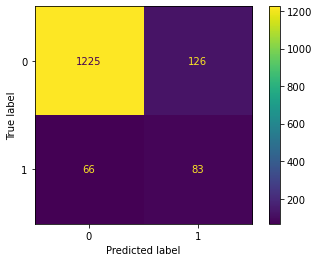

In [60]:
#Plotting confusion matrix
plot_confusion_matrix(NB_M2,Xdtestsc,Yd_test)


part 1: 
Naive Bayes Model predicted 1225 cases correctly as people will not opt for Personal loan and 126 cases incorrectly as people will opt for Personal Loan but actually they did not.

Part 2:
Model predicted 66 cases incorrectly as people will not opt for Personal loan but actually they did opt for Personal Loan and 83 cases correctly as people will opt for Personal Loan

Since the objective of our model is to predict the likelihood of a liability customer buying personal loans, this model predicts good but not as good as KNN model


## We can create an understanding that dropping  non correlated features and stadardizing the data results in better performance of the model.

## Selecting best model is completely subjective, since in our case, objective is to predict the likelihood of a liability customer buying Personal Loan, we can choose the model which gives us best recall for true predictions

## So in our case, KNN model becomes the best model as it gives us 79% of correct predictions on True positive cases.

## The reason KNN performs better can be that the distribution is non linear